### BMI 데이터 분석 및 예측

In [39]:
import numpy as np
import pandas as pd

In [40]:
# 데이터셋 불러오기
data = pd.read_csv("data/bmi.csv")
data.shape

(500, 4)

In [41]:
print(data.head())

   Gender  Height  Weight  Index
0    Male     174      96      4
1    Male     189      87      2
2  Female     185     110      4
3  Female     195     104      3
4    Male     149      61      3


In [42]:
# 통계량 확인
data.describe() 

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [43]:
# 결측치 확인
data.isnull().sum() 

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [44]:
data2 = data.loc[:, ['Gender','Height', 'Weight' ]]
data2.head()

,Gender,Height,Weight
0,Male,174,96
1,Male,189,87
2,Female,185,110
3,Female,195,104
4,Male,149,61


In [45]:
# BMI 항목 추가
data2['BMI'] = data2['Weight'] / (data2['Height'] / 100) ** 2
data2.head()

,Gender,Height,Weight,BMI
0,Male,174,96,31.708284
1,Male,189,87,24.355421
2,Female,185,110,32.140248
3,Female,195,104,27.350427
4,Male,149,61,27.476240


In [46]:
# 필터링 1
mask1 = (data2.Height >= 180) & (data2.Gender == 'Male')
filter_result = data2.loc[mask1, :]
print(filter_result.shape)
filter_result.head()

(83, 4)


,Gender,Height,Weight,BMI
1,Male,189,87,24.355421
5,Male,189,104,29.114526
10,Male,195,81,21.301775
14,Male,191,79,21.655108
23,Male,185,139,40.613587


In [47]:
mask_male = (data2.Gender == 'Male')
df_male = data2.loc[mask_male, :]
print(df_male.shape)
df_male.head()

(245, 4)


,Gender,Height,Weight,BMI
0,Male,174,96,31.708284
1,Male,189,87,24.355421
4,Male,149,61,27.476240
5,Male,189,104,29.114526
6,Male,147,92,42.574853


In [48]:
mask_female = (data2.Gender == 'Female')
df_female = data2.loc[mask_female, :]
print(df_female.shape)
df_female.head()

(255, 4)


,Gender,Height,Weight,BMI
2,Female,185,110,32.140248
3,Female,195,104,27.350427
9,Female,169,103,36.063163
11,Female,159,80,31.644318
12,Female,192,101,27.398003


In [49]:
# 판단 함수 
def determination(bmi):
    if bmi < 18.5:
        decision = '저체중'
    elif bmi < 23:
        decision = '정상'
    elif bmi < 25:
        decision = '과체중'
    else:
        decision = '비만'
    return decision

In [50]:
# 판단 함수 적용
data2['Result'] = data2['BMI'].apply(determination)
data2.head()

,Gender,Height,Weight,BMI,Result
0,Male,174,96,31.708284,비만
1,Male,189,87,24.355421,과체중
2,Female,185,110,32.140248,비만
3,Female,195,104,27.350427,비만
4,Male,149,61,27.476240,비만


In [51]:
df_male['Result'] = df_male['BMI'].apply(determination)
df_male.head()

C:\Users\kitae\AppData\Local\Temp\ipykernel_5236\1293725952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_male['Result'] = df_male['BMI'].apply(determination)


,Gender,Height,Weight,BMI,Result
0,Male,174,96,31.708284,비만
1,Male,189,87,24.355421,과체중
4,Male,149,61,27.476240,비만
5,Male,189,104,29.114526,비만
6,Male,147,92,42.574853,비만


In [52]:
value_count = df_male['Result'].value_counts()
value_count

비만     196
저체중     21
정상      20
과체중      8
Name: Result, dtype: int64

In [53]:
# 한글 처리 
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

<Axes: >

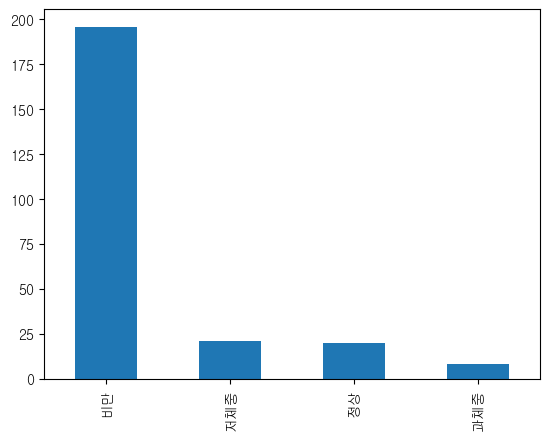

In [54]:
value_count.plot(kind='bar')

In [55]:
print(value_count.index)
print(value_count.values)

Index(['비만', '저체중', '정상', '과체중'], dtype='object')
[196  21  20   8]


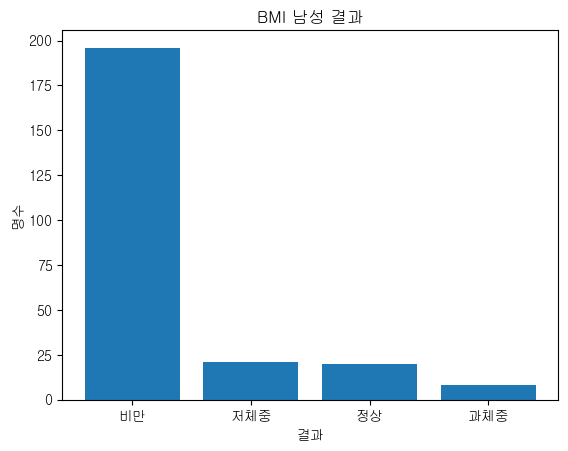

In [56]:
plt.bar(value_count.index, value_count.values)
plt.title("BMI 남성 결과")
plt.xlabel("결과")
plt.ylabel("명수")
plt.show()

In [57]:
df_female['Result'] = df_female['BMI'].apply(determination)
df_female.tail()

C:\Users\kitae\AppData\Local\Temp\ipykernel_5236\460172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female['Result'] = df_female['BMI'].apply(determination)


,Gender,Height,Weight,BMI,Result
492,Female,198,50,12.753801,저체중
493,Female,170,53,18.339100,저체중
495,Female,150,153,68.000000,비만
496,Female,184,121,35.739603,비만
497,Female,141,136,68.407022,비만


In [58]:
value_count = df_female['Result'].value_counts()
value_count

비만     204
정상      27
저체중     13
과체중     11
Name: Result, dtype: int64

<Axes: >

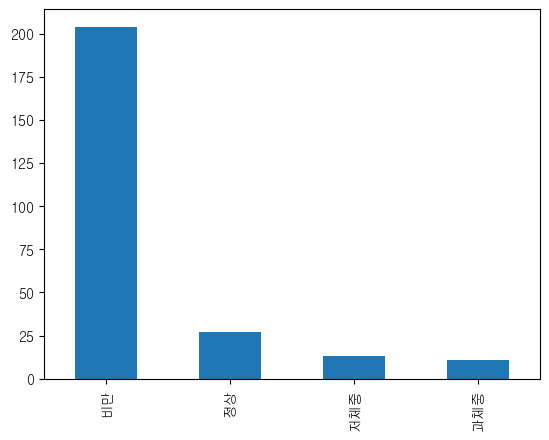

In [59]:
value_count.plot(kind='bar')

In [60]:
data3 = data;
data3.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [61]:
data3[['BMI', 'Result']] = data2[['BMI', 'Result']]
data3.head()

,Gender,Height,Weight,Index,BMI,Result
0,Male,174,96,4,31.708284,비만
1,Male,189,87,2,24.355421,과체중
2,Female,185,110,4,32.140248,비만
3,Female,195,104,3,27.350427,비만
4,Male,149,61,3,27.476240,비만
